<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [55]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

In [56]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [57]:
ds = pd.read_csv('/content/bank-1.csv')

## Data Overview

###View the First Few Rows

In [58]:
# Display the first 5 rows of the dataset
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [59]:
#Display the last 5 rows of the dataset
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


###View the Dataset Summary

In [60]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


###Observations:
- There are 14 variables in data set among those 2 float, 9  integer and 3 object.

###View Statistical Summary

In [61]:
ds.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### **Observations from the Statistical Summary:**
1. **Credit Score:** The average credit score is **650**, with a minimum of **350** and a maximum of **850**, showing a wide range of customer creditworthiness.
2. **Age:** The average customer age is **38.92 years**, ranging from **18 to 92 years**, indicating a diverse customer base.

3. **Balance:** The mean balance is **$76465**, but some customers have a balance of **$0**, suggesting variations in account usage.

4. **Number of Products:** The majority of customers hold **1 to 2 products**, with a maximum of **4**.
5. **Has Credit Card:** Around **70.55%** of customers own a credit card.
6. **Is Active Member:** About **51.5%** of customers are active members, indicating a balanced engagement.
7. **Estimated Salary:** Salaries range from **$11,580 to $199,992**, with a mean of **$100,090**, showing income diversity.
8. **Churn Rate (Exited):** About **20.37%** of customers have exited, highlighting potential churn concerns.

This summary provides insights into customer demographics, product engagement, and financial behavior.

### View Dataset Shape

In [62]:
ds.shape

(10000, 14)

###Observations:
- There are 10000 rows and 14 columns in the data set.

###Check for Missing Values

In [63]:
ds.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


###Observations:
- There is no missing value in the data set.

In [64]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
print(ds.shape)

(10000, 11)


## Exploratory Data Analysis

### Univariate Analysis

In [65]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [66]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

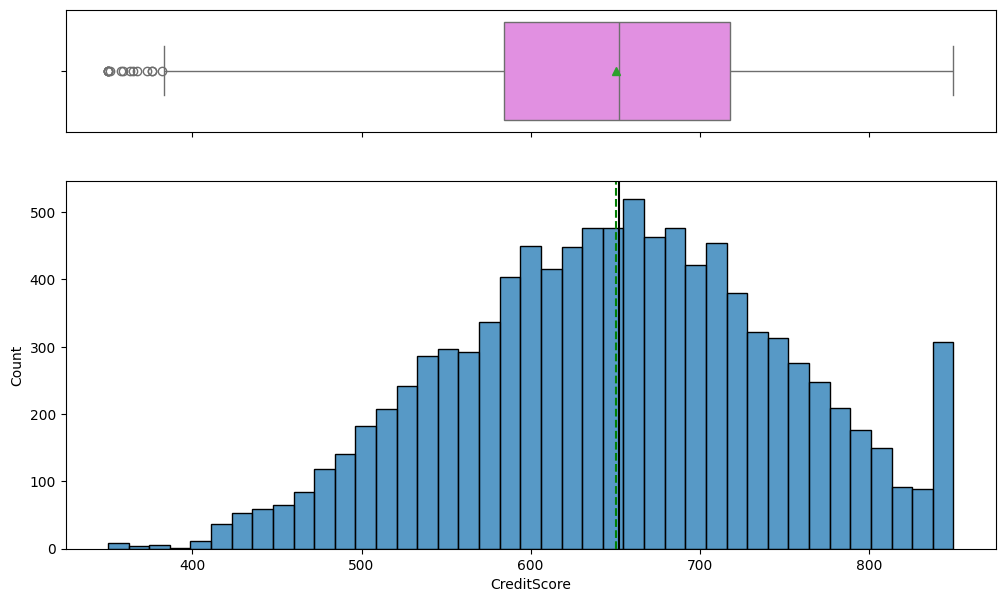

In [67]:
histogram_boxplot(ds,'CreditScore')

### **Observations from the Credit Score Distribution:**
1. **Normal Distribution:** The histogram shows a roughly normal distribution of credit scores, with most customers concentrated around **600-700**.
2. **Outliers:** The box plot above indicates **several outliers** on the lower end (below 400).
3. **High-Frequency Bin:** A noticeable peak appears **around 850**, suggesting a group of customers with very high credit scores.
4. **Median & Spread:** The median (green dashed line) is **around 650**, with most values ranging between **500 and 750**.
5. **Data Skewness:** There is a slight **right skew**, indicating a higher number of customers with above-average credit scores.

This visualization helps in understanding customer creditworthiness distribution and identifying potential risk groups.

#### Observations on Age

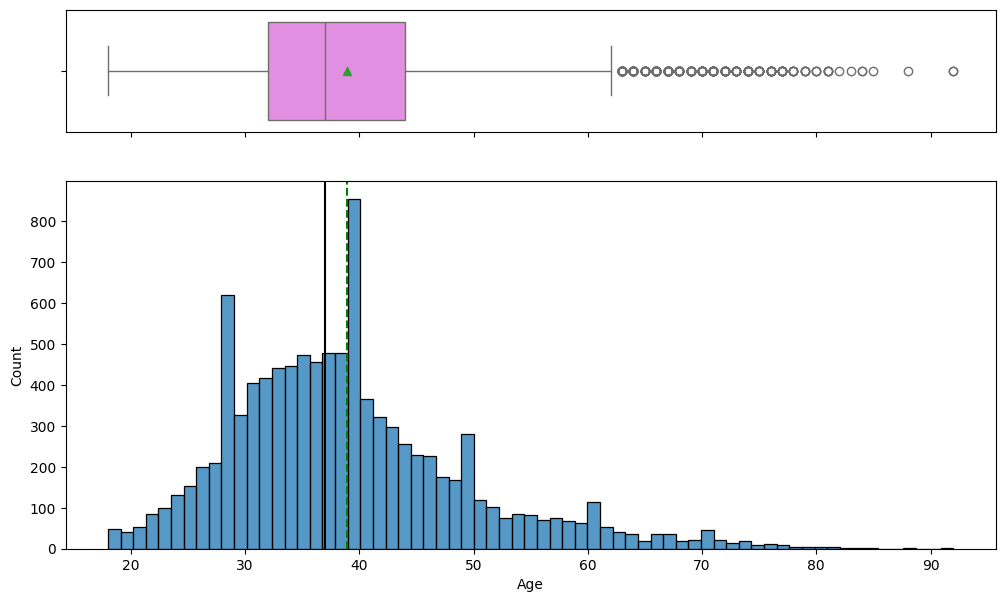

In [68]:
histogram_boxplot(ds,'Age')

### **Observations from the Age Distribution:**
1. **Right-Skewed Distribution:** The histogram is **right-skewed**, indicating more younger individuals in the dataset.
2. **Median Age:** The median (green dashed line) is **around 37-38 years**.
3. **Peak at Specific Ages:** There are **distinct spikes around ages 30 and 40**, suggesting a high concentration of individuals in these age groups.
4. **Outliers:** The box plot shows **several outliers beyond 60 years**, indicating a smaller but significant presence of older individuals.
5. **Diverse Age Range:** The distribution covers a broad age range, from **around 18 to 90 years**.

This insight helps in **customer segmentation** and **age-based financial decision-making**.

#### Observations on Balance

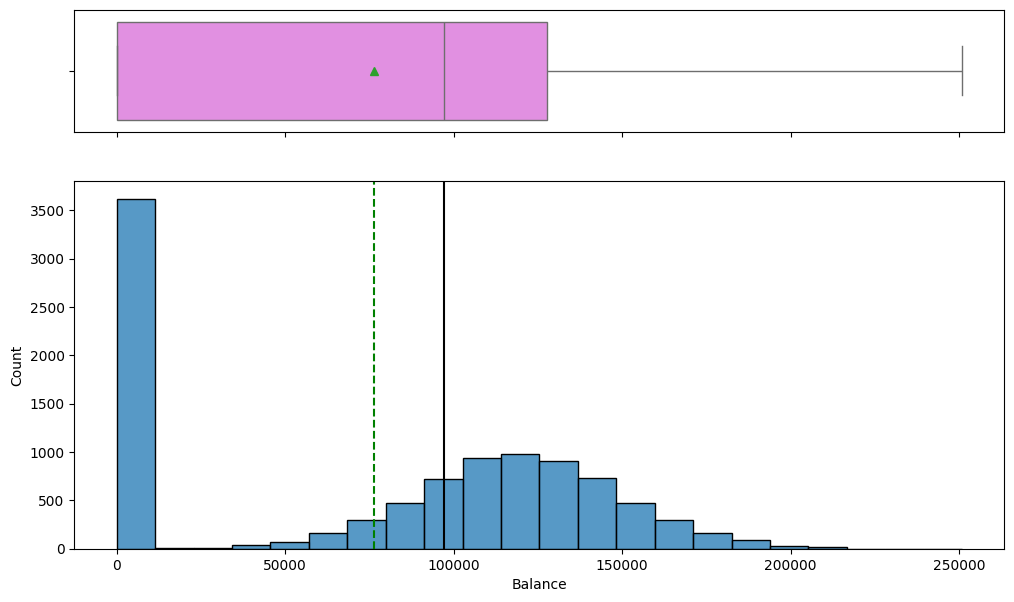

In [69]:
histogram_boxplot(ds,'Balance')

### Observations:
1. **Highly Skewed Distribution** – A significant number of customers have a balance of **zero**, creating a **left-skewed distribution**.
2. **Majority in Mid-Range** – Most non-zero balances are **clustered around 100,000 to 150,000**.
3. **Presence of Outliers** – The boxplot suggests some **extreme values**, but they are within the whiskers.
4. **Potential Bimodal Trend** – The histogram shows a **gap between zero and the main distribution**, possibly indicating **two distinct groups** of customers.

#### Observations on Estimated Salary

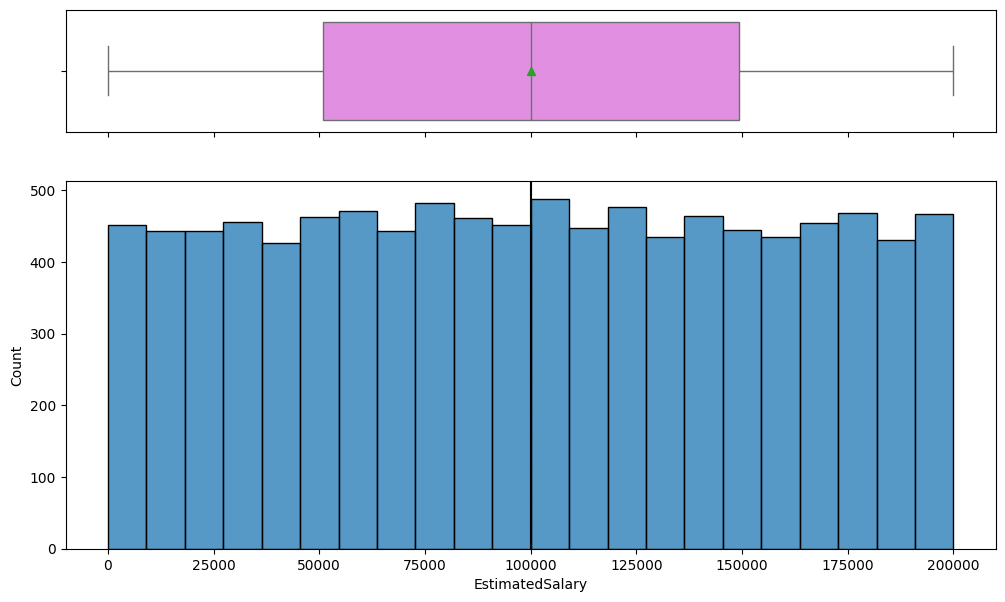

In [70]:
histogram_boxplot(ds,'EstimatedSalary')

### **Observations on Estimated Salary Distribution:**

1. **Uniform Distribution:** The histogram shows a fairly **even distribution** of estimated salaries across different salary ranges.
2. **Median Salary:** The median (green triangle) is around **100,000**.
3. **Box Plot Analysis:** No significant **outliers** are visible, and the salaries are **evenly spread**.
4. **Balanced Income Groups:** The number of individuals across different salary brackets is nearly **consistent**, indicating **no extreme skewness** in income levels.
5. **Wider Salary Range:** Salaries **vary from 0 to 200,000**, covering a broad range of income levels.

This suggests a **diverse customer base** with **even income distribution** across all salary levels.

#### Observations on Exited

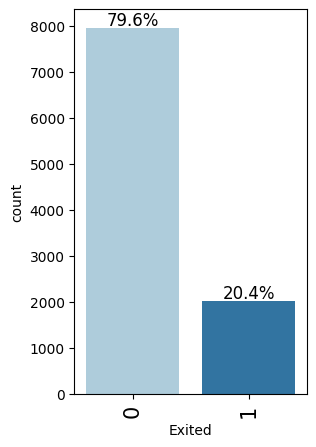

In [71]:
labeled_barplot(ds, 'Exited', perc=True)

### **Observation on Customer Exit Rate:**

1. **Retention Rate is High:** **79.6%** of customers have stayed with the company.
2. **Exit Rate is Moderate:** **20.4%** of customers have exited, indicating some level of churn.
3. **Potential Concern:** While the majority of customers remain, the **20.4% exit rate** suggests room for **improvement in customer retention strategies**.
4. **Further Analysis Needed:** Investigate factors such as **customer demographics, account balance, tenure, and services used** to understand why customers leave.

#### Observations on Geography

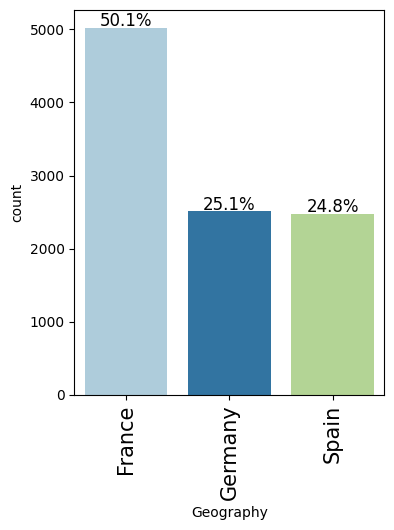

In [72]:
labeled_barplot(ds, 'Geography', perc=True)

### **Observation on Customer Distribution by Geography:**

1. **France has the Highest Customer Base:** **50.1%** of the customers are from France, making it the dominant market.
2. **Germany and Spain are Nearly Equal:** **Germany (25.1%)** and **Spain (24.8%)** have a similar share of customers.
3. **Potential Market Differences:** The customer distribution suggests **France is the primary market**, while **Germany and Spain have similar but lower engagement**.
4. **Further Analysis Needed:** Investigate **customer behavior, retention, and churn rates** across these geographies to identify region-specific trends and opportunities.

#### Observations on Gender

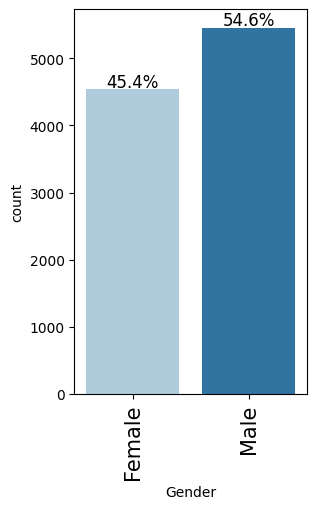

In [73]:
labeled_barplot(ds, 'Gender', perc=True)

### **Observation on Customer Distribution by Gender:**

1. **Male Customers are the Majority:** **54.6%** of customers are male, while **45.4%** are female.
2. **Slight Gender Imbalance:** The difference is not very large, but males have a higher representation.
3. **Further Analysis Needed:** Investigate **churn rates, spending habits, and customer behavior** across genders to identify any trends or opportunities for targeted marketing strategies.

#### Observations on Tenure

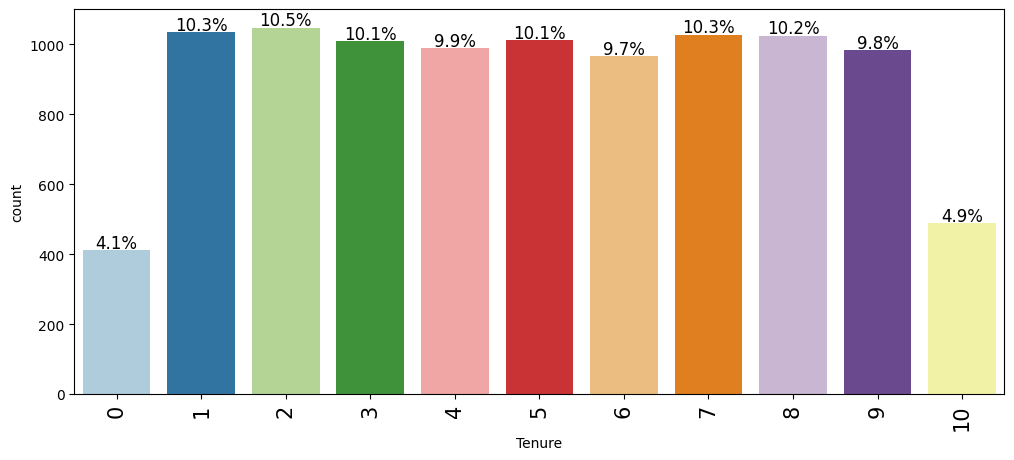

In [74]:
labeled_barplot(ds, 'Tenure', perc=True)

### **Observation on Tenure Distribution:**
1. **Even Distribution:** Most tenure groups (1 to 9 years) have a fairly even distribution, ranging from **9.7% to 10.5%** of customers.
2. **Low Tenure at Start & End:** Customers with **0 years (new customers) make up only 4.1%**, while **10-year tenure customers account for 4.9%**.
3. **Retention Strategy Needed:** A slight drop in **long-term customers** suggests a need for **better retention strategies** to keep high-tenure customers engaged.

#### Observations on Number of Products

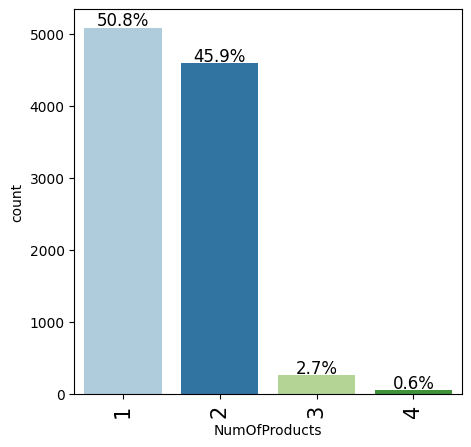

In [75]:
labeled_barplot(ds, 'NumOfProducts', perc=True)

### **Observation on Number of Products Distribution:**
1. **Majority Have 1 or 2 Products:**  
   - **50.8%** of customers have **1 product**.  
   - **45.9%** have **2 products**.  

2. **Few Customers Have More:**  
   - Only **2.7%** have **3 products**.  
   - A very small **0.6%** have **4 products**.  

3. **Upselling Opportunity:**  
   - The low percentage of customers with **more than 2 products** suggests **cross-selling potential** to increase product adoption.

#### Observations on Has Credit Card

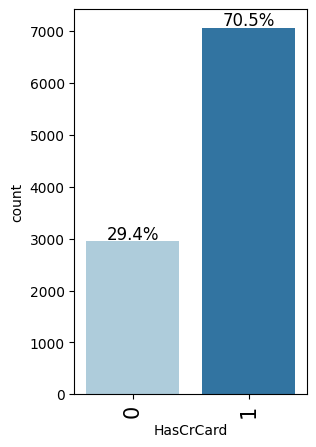

In [76]:
labeled_barplot(ds, 'HasCrCard', perc=True)

### **Observation on Credit Card Ownership:**
1. **Majority Have Credit Cards:**  
   - **70.5%** of customers own a **credit card**.  
   - **29.4%** do **not** have a credit card.  

2. **Potential for Card Adoption:**  
   - Nearly **30%** of customers may be targeted for credit card adoption campaigns.  

3. **Possible Credit Risk Factor:**  
   - Further analysis is needed to check whether **credit card ownership affects customer retention or default rates**.

#### Observations on Is Active Member

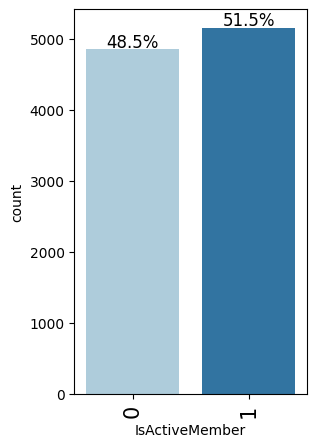

In [77]:
labeled_barplot(ds, 'IsActiveMember', perc=True)

### **Short Observation on Active Membership:**
1. **Slight Majority are Active Members:**  
   - **51.5%** of customers are active members.  
   - **48.5%** are inactive members.  

2. **Balanced Customer Engagement:**  
   - The **active vs. inactive** distribution is almost even.  

3. **Retention Strategy Needed for Inactive Members:**  
   - Since nearly **half** of the customers are inactive, efforts may be needed to **increase engagement and retention** among them.

### Bivariate Analysis

In [78]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

###Visualizing Trends with Histograms

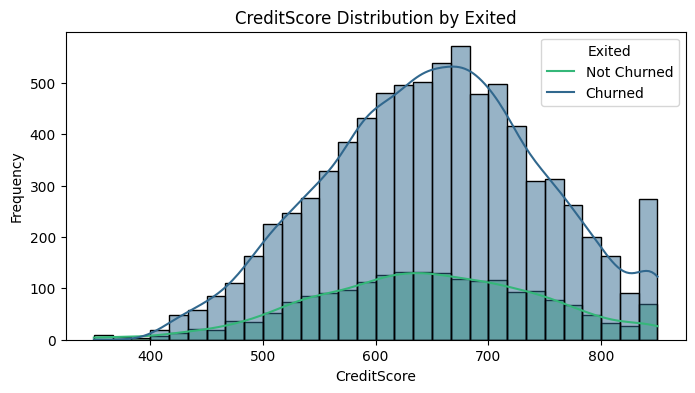

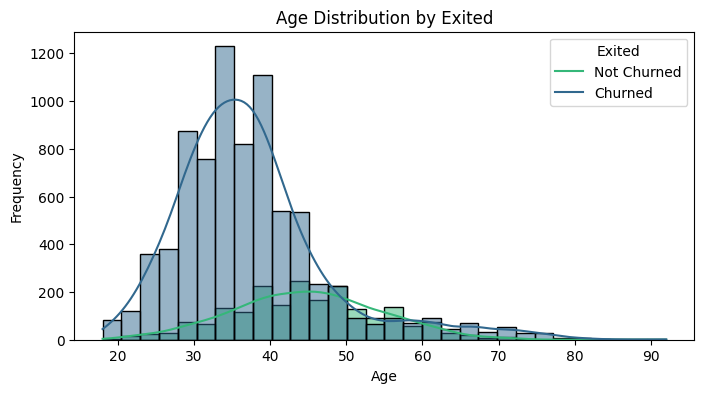

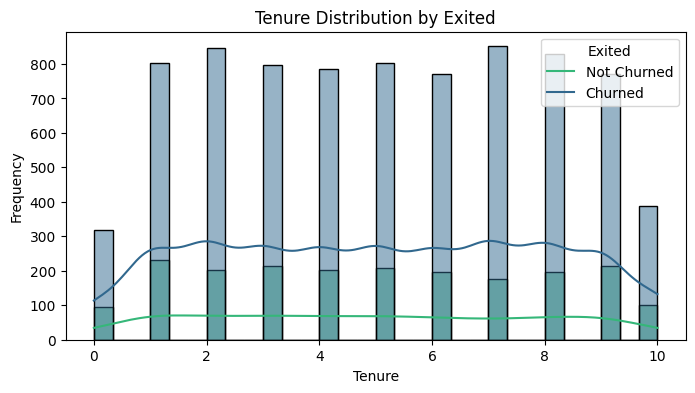

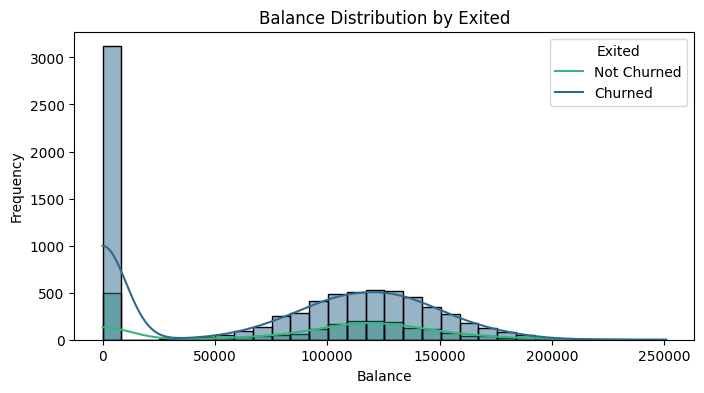

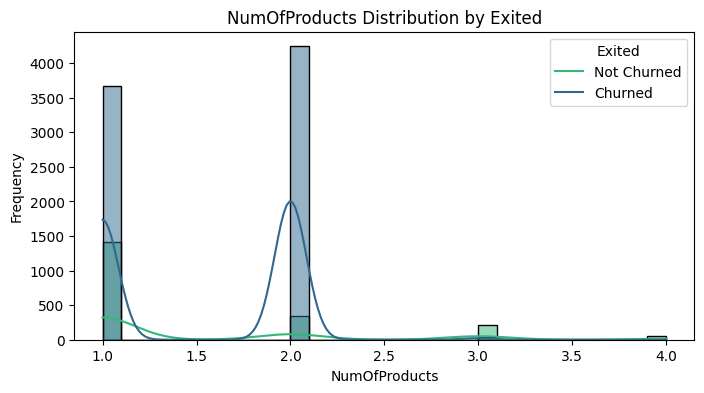

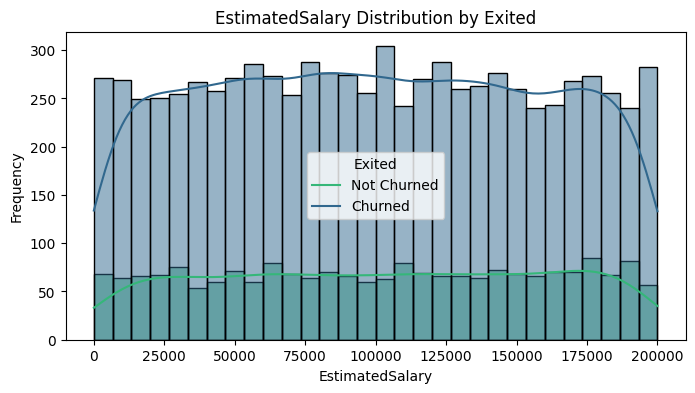

In [79]:
# Compare numerical features with the target variable 'Exited'
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=ds, x=column, hue='Exited', kde=True, palette='viridis', bins=30)
    plt.title(f'{column} Distribution by Exited')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend(title='Exited', labels=['Not Churned', 'Churned'])
    plt.show()

###Observations After Visualizing Trends with Histograms
**CreditScore**:

Customers with higher credit scores are less likely to churn.
The histogram shows a slight bias in churn rates for customers with lower credit scores.

**Age**:

Older customers have a higher likelihood of churning.
The histogram shows that churn increases with age, with a significant peak in the 40–60 age range.

**Tenure**:

The distribution of tenure does not show a clear pattern related to churn.
Churn appears to occur across all tenure levels, though slight differences might exist for customers with very low tenure.

**Balance**:

Customers with zero balance churn at a higher rate compared to those with higher balances.
The histogram shows that non-churning customers are more evenly distributed across balance levels.

**NumOfProducts**:

Customers with only one product have a higher churn rate.
Those with multiple products (e.g., 2 or more) are less likely to churn, suggesting product engagement reduces churn.

**EstimatedSalary**:

No significant relationship is evident between EstimatedSalary and churn.
The histogram shows a uniform distribution of churn across all salary levels.**

###Correlation Heatmap

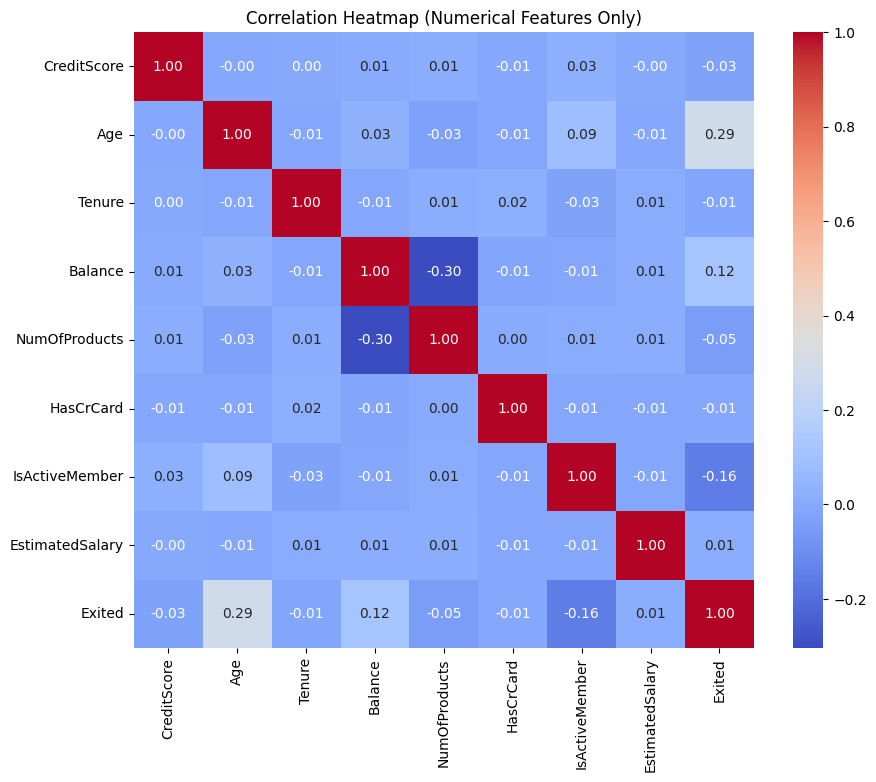

In [80]:
# Exclude categorical columns for correlation
numerical_data = ds.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap (Numerical Features Only)')
plt.show()

###Observations:
The heatmap highlights the correlation between numerical variables and the target variable (Exited), as well as between independent features.

**Correlation with Exited**:

- **Positive Correlation**:
Features with a positive correlation to Exited (e.g., Age, Balance, EstimatedSalary) indicate that as the value of these features increases, the likelihood of churn also increases.

- **Negative Correlation**:
Features with a negative correlation to Exited (e.g., CreditScore, Tenure, NumOfProducts, IsActiveMember) suggest that higher values of these features are associated with lower churn.

**Correlation Between Independent Variables**:

- **CreditScore and EstimatedSalary**: A low correlation may suggest that salary is not a strong determinant of creditworthiness.


##Correlation Check

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


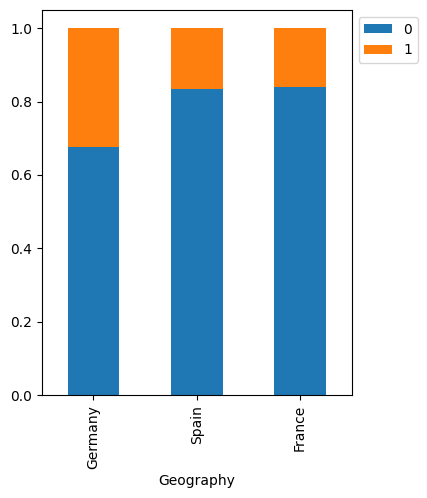

In [81]:
stacked_barplot(ds, "Geography", "Exited" )

### **Short Observation on Customer Exit by Geography:**
1. **Germany has the Highest Exit Rate:**  
   - **814 out of 2,509 customers (32.4%)** in Germany have exited.  

2. **France has a Moderate Exit Rate:**  
   - **810 out of 5,014 customers (16.2%)** have exited.  

3. **Spain has the Lowest Exit Rate:**  
   - **413 out of 2,477 customers (16.7%)** have exited.  

4. **Key Insight:**  
   - Germany has the **highest churn rate**, indicating potential dissatisfaction or challenges.  
   - France and Spain have similar lower exit rates, possibly due to better engagement or customer retention strategies.

#### Exited Vs Gender

Gender  Female  Male    All
Exited                     
All       4543  5457  10000
0         3404  4559   7963
1         1139   898   2037
------------------------------------------------------------------------------------------------------------------------


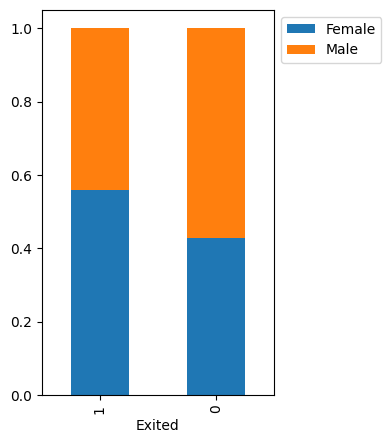

In [82]:
stacked_barplot(ds, "Exited", "Gender")

### **Short Observation on Customer Exit by Gender:**
1. **Higher Exit Rate for Females:**
   - **1,139 out of 4,543 females (25.1%)** have exited.
   - **898 out of 5,457 males (16.5%)** have exited.

2. **Key Insight:**
   - Female customers are **more likely to leave** compared to males.
   - This indicates potential **gender-based differences** in customer satisfaction or engagement.

#### Exited Vs Has Credit Card

HasCrCard     0     1    All
Exited                      
All        2945  7055  10000
0          2332  5631   7963
1           613  1424   2037
------------------------------------------------------------------------------------------------------------------------


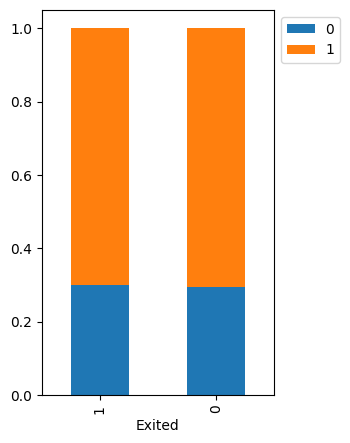

In [83]:
stacked_barplot(ds, "Exited", "HasCrCard")

### **Short Observation on Customer Exit by Credit Card Ownership:**
1. **Exit Rate Comparison:**
   - **Has Credit Card (1):** 1,424 out of 7,055 (20.2%) exited.
   - **No Credit Card (0):** 613 out of 2,945 (20.8%) exited.

2. **Key Insight:**
   - **Slightly higher exit rate for customers without a credit card (20.8%)** compared to those with one (20.2%).
   - This suggests that **credit card ownership has minimal impact** on customer retention.

#### Exited Vs Is active member

IsActiveMember     0     1    All
Exited                           
All             4849  5151  10000
0               3547  4416   7963
1               1302   735   2037
------------------------------------------------------------------------------------------------------------------------


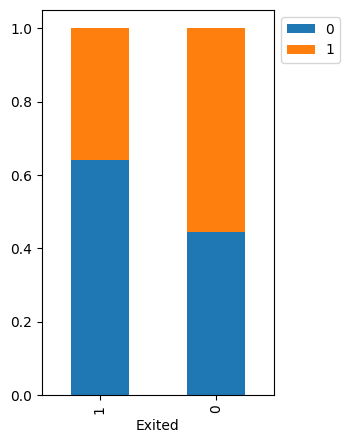

In [84]:
stacked_barplot(ds, "Exited", "IsActiveMember")

### **Short Observation on Customer Exit by Active Membership Status:**
1. **Exit Rate Comparison:**
   - **Inactive Members (0):** 1,302 out of 4,849 (26.8%) exited.
   - **Active Members (1):** 735 out of 5,151 (14.3%) exited.

2. **Key Insight:**
   - **Inactive members have a significantly higher exit rate (26.8%)** compared to active members (14.3%).
   - Being an **active member appears to increase customer retention**, suggesting that **engagement programs and loyalty incentives** could help reduce churn.

#### Exited Vs Credit Score

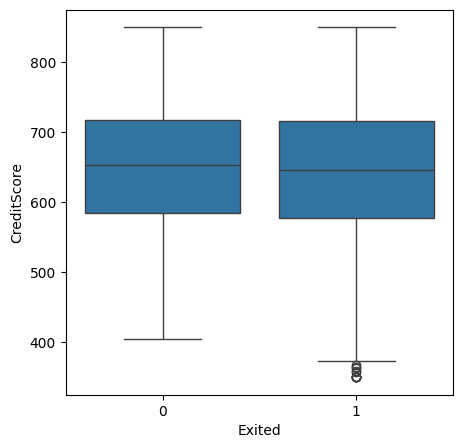

In [85]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

### Observation on Credit Score and Exit Status:
1. **Comparison of Credit Scores:**
   - The **median credit score** for both exited (1) and non-exited (0) customers is nearly the same.
   - The interquartile range (IQR) appears similar, suggesting **no major difference in credit scores** between those who stayed and those who exited.

2. **Outliers:**
   - The **exited group (1) has more low credit score outliers** (<400), indicating some customers with poor credit scores were more likely to leave.

3. **Key Insight:**
   - **Credit score does not significantly impact customer exit rates overall**, but a **small subset of low-credit customers may be at higher risk of leaving**.

#### Exited Vs Age

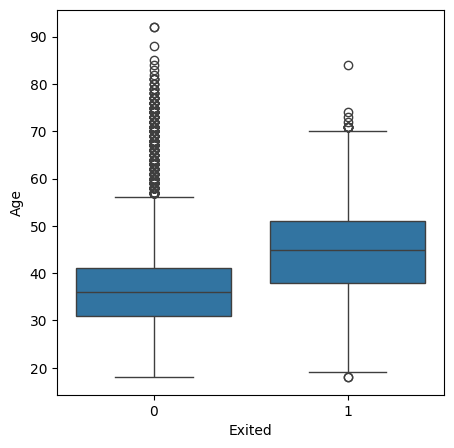

In [86]:
plt.figure(figsize=(5,5))
sns.boxplot(y="Age",x="Exited",data=ds)
plt.show()

### Observation on Age and Exit Status:
1. **Age Distribution:**
   - Customers who **exited (1) are generally older** than those who stayed (0).
   - The median age of exited customers is **higher** than that of retained customers.

2. **Outliers:**
   - There are **more older customers (above 60) in the exited group**, suggesting older individuals are more likely to leave.

3. **Key Insight:**
   - **Older customers are at higher risk of leaving the bank.** A possible reason could be changes in financial needs, service preferences, or retirement.

#### Exited Vs Tenure

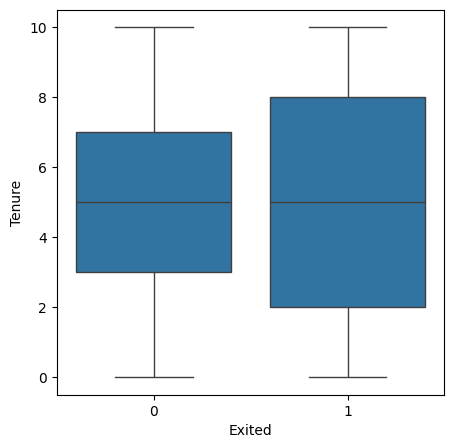

In [87]:
plt.figure(figsize=(5,5))
sns.boxplot(y="Tenure",x="Exited",data=ds)
plt.show()

### Observation on Tenure and Exit Status:
1. **Tenure Distribution:**
   - The median tenure for **exited (1) and retained (0) customers is quite similar**.
   - Customers with shorter and longer tenures exist in both groups.

2. **Key Insight:**
   - **Tenure does not show a strong correlation with customer exit**, as both distributions look similar.
   - This suggests that **tenure alone may not be a decisive factor** in predicting customer churn. Other factors, such as service satisfaction or financial incentives, might have a greater impact.

#### Exited Vs Balance

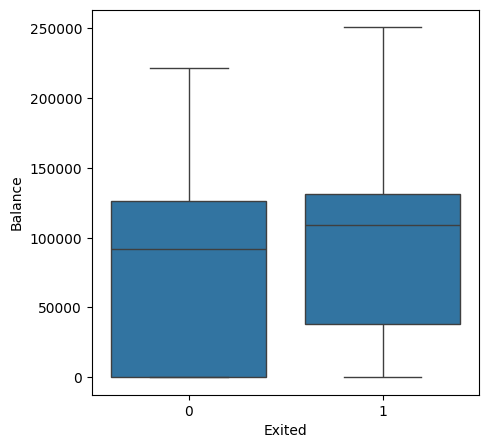

In [88]:
plt.figure(figsize=(5,5))
sns.boxplot(y="Balance",x="Exited",data=ds)
plt.show()

### **Observation on Balance vs. Exit Status:**
1. **Balance Distribution:**
   - The **median balance** is slightly **higher for exited customers** compared to those who stayed.
   - Both groups have a **wide range of balances**, with a few high-balance customers.

2. **Key Insight:**
   - Customers with **higher balances appear to have a higher tendency to exit**.
   - This suggests that high-balance customers may have **different banking behaviors**, possibly moving funds to better investment opportunities or switching banks for better benefits.
   - The bank may need **targeted retention strategies** for high-balance customers.

#### Exited Vs Number of Products

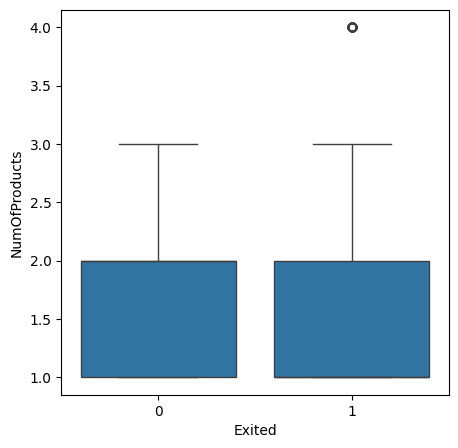

In [89]:
plt.figure(figsize=(5,5))
sns.boxplot(y="NumOfProducts",x="Exited",data=ds)
plt.show()

### **Observation on Number of Products vs. Exit Status:**
1. **Number of Products Distribution:**
   - Most customers (both exited and retained) **own 1 or 2 products**.
   - There is **one significant outlier** with 4 products.
   - The **median number of products is the same for both exited and non-exited customers**.

2. **Key Insights:**
   - **Owning multiple products does not significantly influence exit probability**.
   - However, customers with 4 products (outliers) might have **unique behaviors** that should be examined further.
   - The bank can analyze if **cross-selling additional products** helps retain customers or if having more products leads to dissatisfaction.

#### Exited Vs Estimated Salary

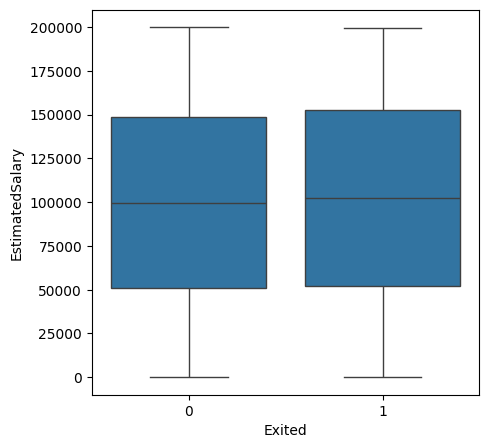

In [90]:
plt.figure(figsize=(5,5))
sns.boxplot(y="EstimatedSalary",x="Exited",data=ds)
plt.show()

### **Observation on Number of Products vs. Customer Exit Status:**
1. **Distribution Analysis:**
   - The majority of customers (both exited and retained) **own only 1 or 2 products**.
   - There is **one significant outlier** where a customer owns 4 products.
   - The **median number of products is the same** for both exited and non-exited groups, indicating no major difference in product ownership.

2. **Key Insights:**
   - **Owning multiple products does not significantly influence customer retention**.
   - However, customers with **more than 2 products might exhibit different behaviors** and should be examined separately.
   - The bank may need to **analyze if cross-selling more products enhances retention or if customers with more products feel overwhelmed** and leave.



## Data Preprocessing

### Dummy Variable Creation

In [91]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
ds = ds.astype(float)
ds.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


### Train-validation-test Split

In [92]:
from sklearn.model_selection import train_test_split

# Drop the 'Exited' column to separate features (X) and target variable (y)
X = ds.drop(columns=['Exited'])  # Features
y = ds['Exited']  # Target variable

# Splitting the dataset into Training (70%) and Testing (30%)
X_large, X_test, y_large, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

# Splitting the Training dataset into 50% training and 50% validation
X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size=0.5, random_state=42, stratify=y_large, shuffle=True)

In [93]:
print(X_train.shape, X_val.shape, X_test.shape)

(3500, 11) (3500, 11) (3000, 11)


In [94]:
print(y_train.shape, y_val.shape, y_test.shape)

(3500,) (3500,) (3000,)


### **Observation:**
The dataset is split into **training (70%) and testing (30%)**, followed by further splitting the training set into **50% training and 50% validation**. The final dataset sizes are:
- **Training set:** 3,500 samples
- **Validation set:** 3,500 samples
- **Test set:** 3,000 samples
- **Features (X):** 11 columns
- **Stratification is applied** to maintain class balance across splits.

### Data Normalization

In [95]:
from sklearn.preprocessing import StandardScaler

# Creating an instance of the standard scaler
sc = StandardScaler()

# List of numerical columns to scale
cols_list = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

# Fit and transform training data
X_train[cols_list] = sc.fit_transform(X_train[cols_list])

# Transform validation and test data using the same scaler (without fitting again)
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

In [96]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5090,-1.817667,-0.852740,1.347447,-1.221738,0.796417,0.0,0.0,-0.632589,0.0,0.0,0.0
2656,1.317847,-0.466360,-0.037899,-1.221738,0.796417,0.0,1.0,0.210711,0.0,1.0,0.0
5851,-0.769069,-0.562955,-0.730572,-1.221738,0.796417,0.0,1.0,1.573998,0.0,1.0,1.0
4075,0.639342,0.402994,-0.037899,0.161293,-0.924238,1.0,1.0,0.529209,0.0,0.0,1.0
6125,-1.540097,-0.466360,0.654774,0.270955,-0.924238,0.0,1.0,1.742483,1.0,0.0,0.0


In [97]:
print(X_train.shape)

(3500, 11)


## Model Building

### Model Evaluation Criterion

**Let's create a function for plotting the confusion matrix**



In [98]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [99]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

###Model 0

In [100]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [101]:
# Initializing the neural network
model_0 = Sequential()

# Adding the input layer with 64 neurons and ReLU activation function
model_0.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

# Adding a hidden layer with 32 neurons and ReLU activation function
model_0.add(Dense(32, activation='relu'))

# Adding the output layer with 1 neuron and a sigmoid activation function
model_0.add(Dense(1, activation='sigmoid'))

In [146]:
# Using SGD as the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

# Uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [147]:
# Compile the model with recall as a metric
model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['Recall'])

In [148]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

### **Observation:**
The model is a **sequential neural network** with **three dense layers**:
1. **First layer**: 64 neurons, **768 parameters**
2. **Second layer**: 32 neurons, **2,080 parameters**
3. **Output layer**: 1 neuron, **33 parameters**

- The total number of **trainable parameters** is **2,881**.
- The loss function used is **binary cross-entropy**, indicating a **binary classification problem**.
- The **Recall metric** is used for evaluation, suggesting a focus on minimizing **false negatives**.

In [105]:
history_0 = model_0.fit(
    X_train, y_train,
    batch_size=32,
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=1  # Enables detailed training progress output
)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - Recall: 0.3983 - loss: 0.6830 - val_Recall: 0.1543 - val_loss: 0.6464
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - Recall: 0.1668 - loss: 0.6317 - val_Recall: 0.0337 - val_loss: 0.6070
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - Recall: 0.0348 - loss: 0.5952 - val_Recall: 0.0056 - val_loss: 0.5786
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - Recall: 0.0019 - loss: 0.5689 - val_Recall: 0.0000e+00 - val_loss: 0.5579
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - Recall: 0.0000e+00 - loss: 0.5495 - val_Recall: 0.0000e+00 - val_loss: 0.5424
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - Recall: 0.0000e+00 - loss: 0.5351 - val_Recall: 0.0000e+00 - val_loss: 0.5307
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - Recall: 0.0000e+00 - loss: 0.5242 - val_Recall: 0.0000e+00 - val_loss: 0.5217
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Recall: 0.0000e+00 - loss: 0.5157 - val_Reca

**Loss function**

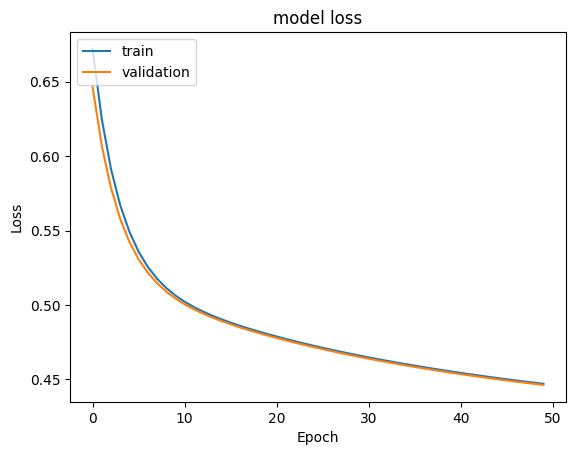

In [106]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

###Observations:
**Behavior**:

- Both training and validation loss start at around 0.65 and decrease steadily over the epochs.
- By the end of training (epoch 50), the losses converge to a similar value (~0.45).

**Interpretation:**

- The steady decrease in loss indicates that the model is successfully learning from the training data without significant overfitting.
- The convergence of training and validation loss suggests that the model generalizes well to unseen data.

**Recall**

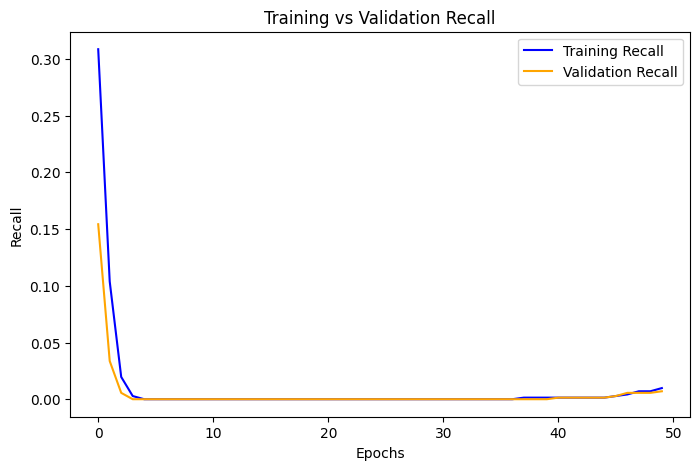

In [119]:
# Plot Training vs Validation Recall
plt.figure(figsize=(8, 5))
plt.plot(history_0.history['Recall'], label='Training Recall', color='blue')  # Capitalized 'Recall'
plt.plot(history_0.history['val_Recall'], label='Validation Recall', color='orange')  # Capitalized 'val_Recall'
plt.title('Training vs Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

###Observations:
**Behavior:**

- Initially, both training and validation recall start at higher values (~0.3).
However, after the first few epochs, both quickly drop to near-zero and remain flat for the rest of the training process.

**Interpretation**:

- This indicates a potential issue where the model is unable to learn features to distinguish between classes effectively.

**The rapid decline suggests either:**
- The learning rate is too high, causing the model to overshoot the optimal weights.
- The optimizer (e.g., SGD) may not be effective for the current problem.
The model architecture might lack sufficient complexity to capture the data patterns.

In [108]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

###Observations:
- The output ([[False], [False], [False], ...]) suggests that the predictions from the model on the train data are all classified as False (or class 0).

- This indicates an issue where the model is heavily biased towards predicting the majority class, potentially due to class imbalance or ineffective learning.

In [109]:
# Predicting the results using 0.5 as a threshold
y_val_pred = model_0.predict(X_val)  # Make predictions on validation data
y_val_pred = (y_val_pred > 0.5)  # Convert probabilities to binary predictions
y_val_pred

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

###Observations:
- The output ([[False], [False], [False], ...]) suggests that the predictions from model on the validation data are all classified as False (or class 0).

This indicates an issue where the model is heavily biased towards predicting the majority class, potentially due to class imbalance or ineffective learning.

In [110]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [ ]:
#Classification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      2787
         1.0       1.00      0.01      0.02       713

    accuracy                           0.80      3500
   macro avg       0.90      0.50      0.45      3500
weighted avg       0.84      0.80      0.71      3500



###Observations:
**Imbalance in Class Performance**:

- The model is biased towards the majority class (0) and struggles to detect the minority class (1).
- High precision for class 1 is misleading because the model rarely predicts it.

**Low Recall for Class 1**:

- The recall for class 1 is just 1%, meaning the model fails to identify almost all true 1 instances.

**Accuracy is Misleading**:

- Despite 80% accuracy, the model is performing poorly on the minority class, making it unsuitable for imbalanced data tasks.

In [111]:
# Generate classification report for validation set
cr = classification_report(y_val, y_val_pred)  # Compare actual vs predicted labels
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      2787
         1.0       0.83      0.01      0.01       713

    accuracy                           0.80      3500
   macro avg       0.82      0.50      0.45      3500
weighted avg       0.80      0.80      0.71      3500



###Observations:
**Severe Class Imbalance**:

- The model is heavily biased towards the majority class (0).
High performance on class 0 masks the poor performance on class 1.

**Low Recall for Class 1**:

- With only 1% recall, the model is almost completely unable to identify instances of the minority class.

**Over-reliance on Accuracy**:

The high accuracy of 80% is misleading in this imbalanced context.

**Confusion matrix**

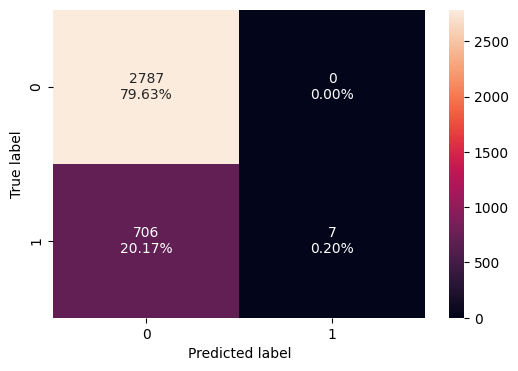

In [112]:
make_confusion_matrix(y_train, y_train_pred)

###Observations:
**Class 0 (Majority)**: Perfect classification with 2787 true negatives and 0 false positives.
**Class 1 (Minority)**: Similar to validation, only 7 true positives were detected, while 706 instances were misclassified as 0.

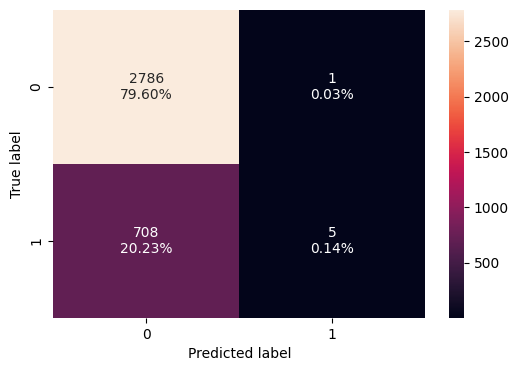

In [113]:
make_confusion_matrix(y_val,y_val_pred)

###Observations:
**Class 0 (Majority)**: Almost all instances are correctly classified (2786 true negatives, 1 false positive).

**Class 1 (Minority**): Poor performance with only 5 true positives and 708 false negatives, indicating difficulty detecting the minority class.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [114]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

###Model 1

In [115]:
# Initializing the neural network
model_1 = Sequential()

# Adding the input layer with 64 neurons and ReLU activation function
model_1.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

# Adding a hidden layer with 32 neurons and ReLU activation function
model_1.add(Dense(32, activation='relu'))

# Adding the output layer with 1 neuron and sigmoid activation function (for binary classification)
model_1.add(Dense(1, activation='sigmoid'))

In [116]:
#Using Adam as the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Default LR is 0.001, can be tuned

# Uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()  # Note: F1Score is not directly available in Keras

In [124]:
model_1.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['Recall']
)

In [125]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [126]:
history_1 = model_1.fit(
    X_train, y_train,
    batch_size=32,  # Typical choices: 16, 32, 64
    validation_data=(X_val, y_val),
    epochs=50,  # Start with 50 epochs, use EarlyStopping to prevent overfitting
    verbose=1
)

Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - Recall: 0.0524 - loss: 0.5346 - val_Recall: 0.0898 - val_loss: 0.4300
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Recall: 0.1846 - loss: 0.4181 - val_Recall: 0.2482 - val_loss: 0.3999
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Recall: 0.2921 - loss: 0.3924 - val_Recall: 0.3352 - val_loss: 0.3770
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Recall: 0.3682 - loss: 0.3739 - val_Recall: 0.3604 - val_loss: 0.3644
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Recall: 0.3925 - loss: 0.3628 - val_Recall: 0.3689 - val_loss: 0.3581
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Recall: 0.3954 - loss: 0.3563 - val_Recall: 0.3843 - val_loss: 0.3549
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Recall: 0.4053 - loss: 0.3518 - val_Recall: 0.3913 - val_loss: 0.3530
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Recall: 0.4282 - loss: 0.3484 - val_Recall: 0.3955 - val_loss: 0.3520
Epoch 9

####Loss Function

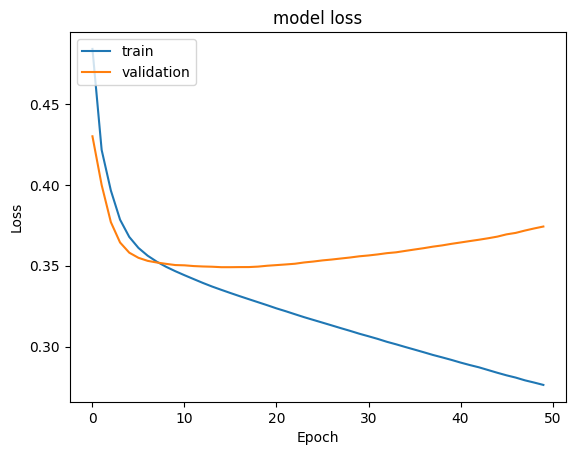

In [127]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

###Observations on **Model 1 (Adam Optimizer)**

**Training Loss**:

- The training loss decreases consistently over the epochs, indicating the model is learning effectively from the training data.

**Validation Loss**:

- Validation loss starts low but increases after around 10 epochs, showing signs of overfitting as the model struggles to generalize to unseen data.

**Key Observation**:

- While Adam optimizer improves initial learning, the increasing validation loss suggests overfitting. Techniques like dropout, early stopping, or regularization may help.

####Recall

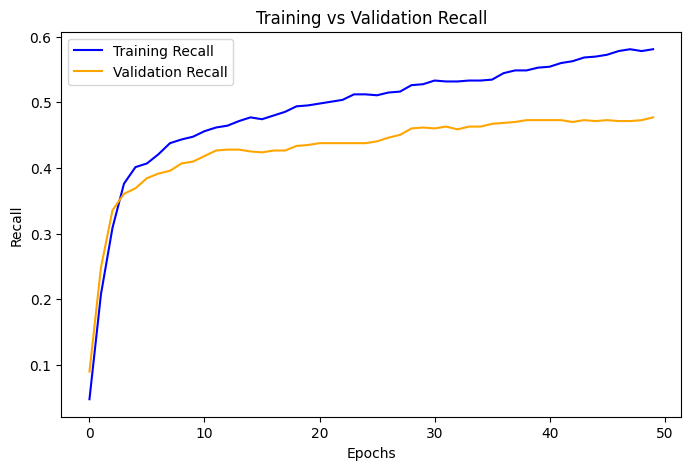

In [130]:
# Plot Training vs Validation Recall
plt.figure(figsize=(8, 5))
plt.plot(history_1.history['Recall'], label='Training Recall', color='blue')  # Capitalized 'Recall'
plt.plot(history_1.history['val_Recall'], label='Validation Recall', color='orange')  # Capitalized 'val_Recall'
plt.title('Training vs Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

###Observations:

1. **Training Recall:**
   - The training recall steadily improves throughout the epochs, reaching approximately **0.6** at the end, indicating the model learns to identify more positive instances over time.

2. **Validation Recall:**
   - Validation recall improves initially but plateaus around **0.5** after the first few epochs, suggesting limited generalization to unseen data.

3. **Gap Between Training and Validation Recall:**
   - A consistent gap between training and validation recall suggests the model is slightly overfitting to the training data.


In [131]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

###**Observations:**
- Almost all predictions are False, indicating the model struggles to predict the minority class (likely due to class imbalance or high threshold).

In [149]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

###**Observations:**
- Similar to the training set, the majority of predictions are False, with only a few True predictions observed, indicating limited generalization for identifying the positive class.

In [150]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

####Classification report

In [151]:
#Classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      2787
         1.0       0.84      0.57      0.68       713

    accuracy                           0.89      3500
   macro avg       0.87      0.77      0.81      3500
weighted avg       0.89      0.89      0.88      3500



###**Observations:**
The model performs well for class 0 with high precision and recall but struggles to identify class 1, showing lower recall(0.57).

In [135]:
#Classification report
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      2787
         1.0       0.67      0.48      0.56       713

    accuracy                           0.85      3500
   macro avg       0.77      0.71      0.73      3500
weighted avg       0.83      0.85      0.84      3500



###**Observation:**
- Similar trends as the training set, with strong performance for class 0 but reduced recall for class 1, highlighting generalization issues for the minority class.

####Confusion matrix

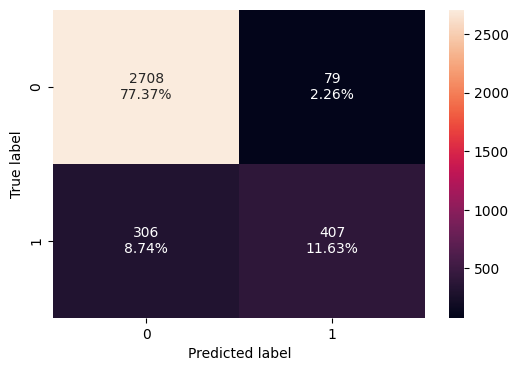

In [137]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

###Observations:

**Training Set Confusion Matrix:**
   - **True Positives (11.63%)**: Slight improvement in detecting class `1` compared to validation.
   - **False Positives (2.26%)**: Minimal misclassification of class `0` as class `1`.

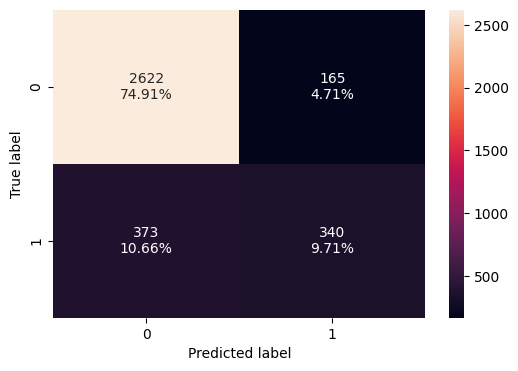

In [138]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

**Validation Set Confusion Matrix:**
   - **True Negatives (74.91%)**: Majority of class `0` predictions are correct.
   - **False Negatives (10.66%)**: Significant portion of class `1` instances misclassified as class `0`.

### Neural Network with Adam Optimizer and Dropout

In [152]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

###Model 2

In [153]:
# Initializing the neural network
model_2 = Sequential()

# Adding the input layer with 32 neurons and ReLU activation function
model_2.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))

# Adding Dropout layer with a ratio of 0.2
model_2.add(Dropout(0.2))

# Adding the first hidden layer with 64 neurons and ReLU activation function
model_2.add(Dense(64, activation='relu'))

# Adding the second hidden layer with 32 neurons and ReLU activation function
model_2.add(Dense(32, activation='relu'))

# Adding Dropout layer with a ratio of 0.1
model_2.add(Dropout(0.1))

# Adding the third hidden layer with 16 neurons and ReLU activation function
model_2.add(Dense(16, activation='relu'))

# Adding the output layer with 1 neuron and sigmoid activation function (for binary classification)
model_2.add(Dense(1, activation='sigmoid'))

In [154]:
# Using Adam as the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Default LR is 0.001, can be tuned

# Uncomment one of the following lines to define the metric to be used
metric = 'accuracy'  # Standard for balanced datasets
# metric = keras.metrics.Recall()  # Use for imbalanced datasets to reduce false negatives
# metric = keras.metrics.Precision()  # Useful when false positives are costly
# metric = keras.metrics.AUC()  # Useful for classification models

In [155]:
# Compile the model with binary cross-entropy and recall as the metric
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['Recall'])

In [156]:
# Summary of the model
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [157]:
history_2 = model_2.fit(
    X_train, y_train,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - Recall: 0.0598 - loss: 0.5341 - val_Recall: 0.0042 - val_loss: 0.4476
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - Recall: 0.0650 - loss: 0.4476 - val_Recall: 0.1220 - val_loss: 0.4243
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Recall: 0.1546 - loss: 0.4265 - val_Recall: 0.2202 - val_loss: 0.4030
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Recall: 0.2518 - loss: 0.4084 - val_Recall: 0.2384 - val_loss: 0.3835
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Recall: 0.2774 - loss: 0.4014 - val_Recall: 0.3226 - val_loss: 0.3683
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - Recall: 0.3133 - loss: 0.3910 - val_Recall: 0.3675 - val_loss: 0.3598
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Recall: 0.3859 - loss: 0.3747 - val_Recall: 0.3843 - val_loss: 0.3578
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Recall: 0.3765 - loss: 0.3857 - val_Recall: 0.4123 - val_loss: 0.3577

####Loss Function

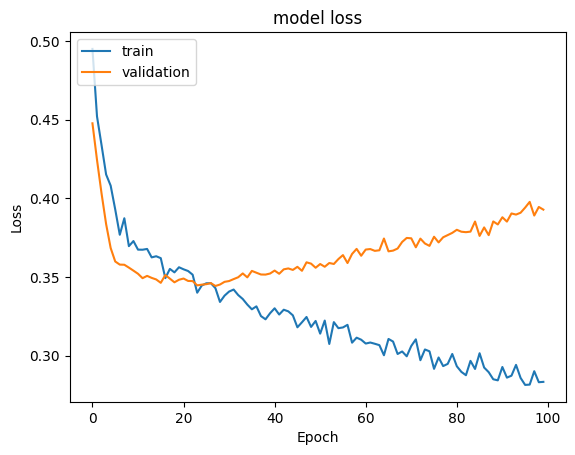

In [158]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

###Observations:
- From the above plot, we can observe that the training and validation loss curves are smooth initially, but validation loss starts to increase after 40 epochs, indicating overfitting.




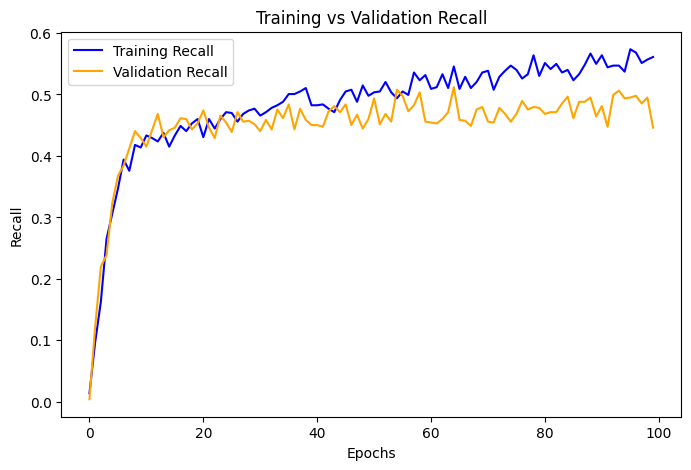

In [161]:
# Plot Training vs Validation Recall
plt.figure(figsize=(8, 5))
plt.plot(history_2.history['Recall'], label='Training Recall', color='blue')
plt.plot(history_2.history['val_Recall'], label='Validation Recall', color='orange')
plt.title('Training vs Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

###Observations:
- The recall for both the training and validation sets improves steadily over the epochs, indicating that the model's ability to correctly identify positive instances is increasing.

- The training and validation recall curves are close, suggesting minimal overfitting and consistent performance across datasets.

In [162]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [163]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Insights for the Predictions:

1. **Training Predictions**:
   - The training predictions output indicates that most predictions are labeled as `False`, likely due to imbalanced data or a strict threshold of 0.5.
   - The results suggest that the model is conservative in classifying positives during training.

2. **Validation Predictions**:
   - For the validation set, the predictions show a mix of `True` and `False`, indicating that the model is attempting to generalize its predictions to unseen data.
   - The threshold of 0.5 might not be optimal for achieving better classification metrics, especially for imbalanced datasets.

In [164]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [166]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      2787
         1.0       0.91      0.63      0.74       713

    accuracy                           0.91      3500
   macro avg       0.91      0.81      0.85      3500
weighted avg       0.91      0.91      0.91      3500



###Observations:
- Class 0 has high precision (0.91) and recall (0.98), showing strong performance.

- Class 1 has moderate recall (0.63) but good precision (0.91), indicating fewer false positives but more false negatives.

- Overall accuracy is 0.91 with a weighted F1-score of 0.91, reflecting a well-trained model.

In [167]:
#classification report
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      2787
         1.0       0.69      0.45      0.54       713

    accuracy                           0.85      3500
   macro avg       0.78      0.70      0.72      3500
weighted avg       0.83      0.85      0.83      3500



###Observations:
- Class 0 maintains good precision (0.87) and recall (0.95), demonstrating consistent performance across datasets.

- Class 1's recall drops to 0.45, highlighting underperformance in detecting true positives.

- Overall accuracy is 0.85, with a weighted F1-score of 0.83, suggesting slightly reduced generalization compared to training.

**Confusion matrix**

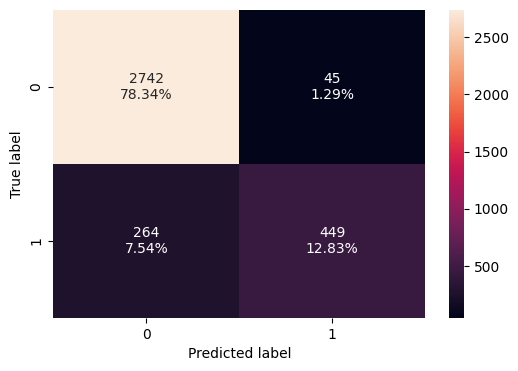

In [168]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

###Insights:
**True Negative (2742, 78.34%):** Most of the negative cases were correctly predicted.

**False Positive (45, 1.29%):** The model misclassified a very small proportion of negative cases.

**False Negative (263, 7.54%):** The model missed a few positive cases, but the recall is slightly better compared to validation.

**True Positive (449, 12.83%):** The model captured a decent proportion of positives, suggesting better performance on the training set compared to validation.








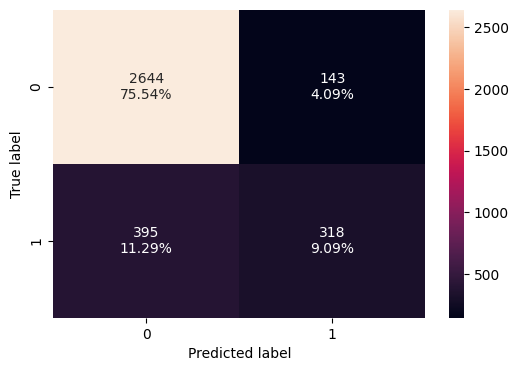

In [169]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

###Insights for Validation Set Confusion Matrix:

**True Negative (2644, 75.54%):** The model correctly identified a majority of the negative class samples.

**False Positive (143, 4.09%):** A small proportion of negatives were misclassified as positive.

**False Negative (318, 9.09%):** Some positive cases were missed by the model.

**True Positive (395, 11.29%):** The model successfully identified a subset of the positive cases, showing room for improvement in identifying positives.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [179]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
sm = SMOTE(random_state=42)

# Fit SMOTE on the training data
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Print the shape of the upsampled data
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (5574, 11)
After UpSampling, the shape of train_y: (5574,) 



###Observations:
- SMOTE successfully balanced the dataset, increasing the number of samples in `X_train` and `y_train` to 5574 each, ensuring equal representation of classes for training.

####**Let's build a model with the balanced dataset**

In [180]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

###Model 3

In [181]:
# Initializing the model
model_3 = Sequential()

# Adding the input layer with 32 neurons and ReLU activation function
model_3.add(Dense(32, activation='relu', input_dim=X_train_smote.shape[1]))

# Adding a hidden layer with 16 neurons and ReLU activation function
model_3.add(Dense(16, activation='relu'))

# Adding another hidden layer with 8 neurons and ReLU activation function
model_3.add(Dense(8, activation='relu'))

# Adding the output layer with 1 neuron and sigmoid activation function (for binary classification)
model_3.add(Dense(1, activation='sigmoid'))

In [182]:
# Using SGD as the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)  # Learning rate is set to 0.001

# Uncomment one of the following lines to define the metric to be used
metric = 'accuracy'  # For balanced datasets
# metric = keras.metrics.Recall()  # Use for imbalanced datasets where recall is critical
# metric = keras.metrics.Precision()  # Use when false positives need to be minimized
# metric = keras.metrics.AUC()  # Optionally use AUC for overall performance

In [183]:
# Compile the model with binary cross-entropy and recall as the metric
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['Recall'])

In [184]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [185]:
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - Recall: 0.8392 - loss: 0.6993 - val_Recall: 0.8050 - val_loss: 0.7198
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - Recall: 0.8297 - loss: 0.6975 - val_Recall: 0.7980 - val_loss: 0.7156
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - Recall: 0.8139 - loss: 0.6959 - val_Recall: 0.7882 - val_loss: 0.7117
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - Recall: 0.7955 - loss: 0.6942 - val_Recall: 0.7714 - val_loss: 0.7078
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - Recall: 0.7799 - loss: 0.6926 - val_Recall: 0.7574 - val_loss: 0.7040
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - Recall: 0.7594 - loss: 0.6910 - val_Recall: 0.7377 - val_loss: 0.7001
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - Recall: 0.7360 - loss: 0.6893 - val_Recall: 0.7139 - val_loss: 0.6961
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - Recall: 0.7089 - loss: 0.6875 - val_Recall: 0.6858 - val_loss: 0

**Loss function**

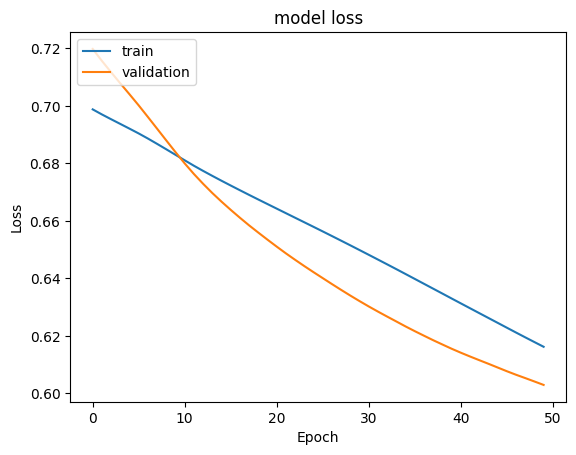

In [186]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Insight for Model Loss Graph:

1. **Training Loss**: The training loss decreases steadily, indicating that the model is learning well from the training data.
2. **Validation Loss**: The validation loss also decreases and aligns closely with the training loss, suggesting that the model generalizes well without overfitting within the observed epochs.

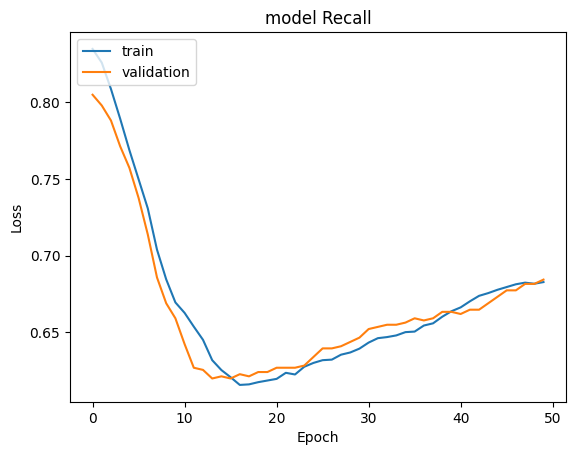

In [189]:
#Plotting Train Recall vs Validation recall
plt.plot(history_3.history['Recall'])
plt.plot(history_3.history['val_Recall'])
plt.title('model Recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

###Observation:
- The training and validation recall curves closely follow each other, showing consistent performance between the training and validation datasets.

- Initially, both curves decrease, but after around 10 epochs, they stabilize and slightly improve. This indicates that the model is learning effectively without overfitting.

In [190]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [191]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [False]])

###Observations on predictions:
- The predictions for both training and validation datasets using a threshold of 0.5 show consistent results.

 The model seems to handle the training data well, but the performance on validation data should be closely analyzed to evaluate its generalization ability.

In [192]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [193]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.68      0.66      0.67      2787
         1.0       0.67      0.68      0.68      2787

    accuracy                           0.67      5574
   macro avg       0.67      0.67      0.67      5574
weighted avg       0.67      0.67      0.67      5574



###Training Dataset:

Both classes (0 and 1) have balanced precision, recall, and F1-scores at 0.67.
The overall accuracy and macro-averaged scores are consistent at 0.67, indicating good balance due to SMOTE.

In [194]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.65      0.75      2787
         1.0       0.33      0.68      0.45       713

    accuracy                           0.65      3500
   macro avg       0.61      0.67      0.60      3500
weighted avg       0.78      0.65      0.69      3500



###Observations on Validation Dataset:

- Class 0 has a higher precision (0.89) but slightly lower recall (0.65), leading to an F1-score of 0.75.

- Class 1 has lower precision (0.33) but better recall (0.68), resulting in an F1-score of 0.45.
Overall accuracy is 0.65, with macro and weighted averages slightly reduced due to the imbalance in precision between classes.

- The SMOTE approach seems to help balance recall between classes, but precision for minority class (1) is still low in validation, indicating potential overfitting or model limitations. Further tuning or feature engineering might improve results.

**Confusion matrix**

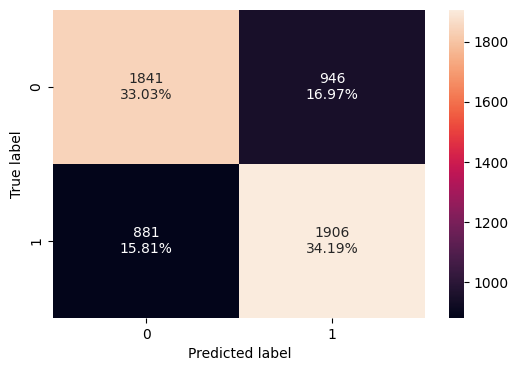

In [195]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

###Observations on Training Set:

**True Positives:** The model identified 1906 cases as class 1 correctly (34.19%).

**False Negatives**: 881 class 1 instances were missed and classified as class 0 (15.81%).

- Training results show slightly better recall than the validation set but still indicate imbalances in predictions. Further optimization may be required to enhance minority class detection.

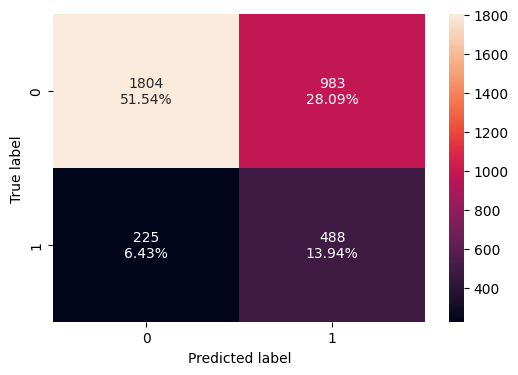

In [196]:
#Calculating the confusion matrix on Validation set
make_confusion_matrix(y_val, y_val_pred)

###Observations on Validation Set:

- **True Positives**: The model correctly predicted 488 cases as class 1 (13.94%).

- **False Negatives**: 225 class 1 instances were incorrectly predicted as class 0 (6.43%).

- **Overall Accuracy:** Moderate, as there is room for improvement in identifying minority class cases.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Let's build a model with the balanced dataset

In [197]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

###Model 4

In [198]:
# Initializing the model
model_4 = Sequential()

# Adding the input layer with 64 neurons and ReLU activation function
model_4.add(Dense(64, activation='relu', input_dim=X_train_smote.shape[1]))

# Adding a hidden layer with 32 neurons and ReLU activation function
model_4.add(Dense(32, activation='relu'))

# Adding another hidden layer with 16 neurons and ReLU activation function
model_4.add(Dense(16, activation='relu'))

# Adding the output layer with 1 neuron and sigmoid activation function (for binary classification)
model_4.add(Dense(1, activation='sigmoid'))

In [199]:
# Complete the code to use Adam as the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Default learning rate is 0.001, can be tuned

# Uncomment one of the following lines to define the metric to be used
metric = 'accuracy'  # Standard metric for balanced datasets
# metric = keras.metrics.Recall()  # Use for imbalanced datasets where recall is important
# metric = keras.metrics.Precision()  # Use when minimizing false positives is crucial
# metric = keras.metrics.AUC()  # Useful to evaluate performance across threshold

In [201]:
# Compile the model
model_4.compile(
    loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
    optimizer=optimizer,        # Adam or any optimizer you defined earlier
    metrics=['Recall']  # Use Recall as the metric
)

In [202]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [203]:
history_4 = model_4.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - Recall: 0.6348 - loss: 0.6280 - val_Recall: 0.8093 - val_loss: 0.5725
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - Recall: 0.7870 - loss: 0.5008 - val_Recall: 0.8050 - val_loss: 0.5322
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - Recall: 0.7894 - loss: 0.4677 - val_Recall: 0.8050 - val_loss: 0.5271
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - Recall: 0.7940 - loss: 0.4522 - val_Recall: 0.7938 - val_loss: 0.5226
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - Recall: 0.7946 - loss: 0.4387 - val_Recall: 0.7868 - val_loss: 0.5211
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - Recall: 0.7956 - loss: 0.4276 - val_Recall: 0.7756 - val_loss: 0.5195
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - Recall: 0.8015 - loss: 0.4177 - val_Recall: 0.7714 - val_loss: 0.5195
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - Recall: 0.8055 - loss: 0.4085 - val_Recall: 0.7686 - val_loss:

**Loss function**

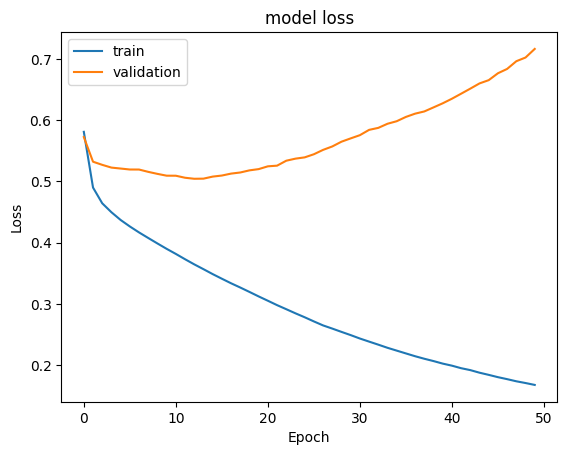

In [204]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Observations for Model Loss:

- **Training Loss**: Decreases consistently, indicating the model is learning effectively from the training data.
- **Validation Loss**: Starts to increase after a point, suggesting overfitting as the model fails to generalize well on unseen data. Consider using early stopping or regularization techniques to prevent overfitting.

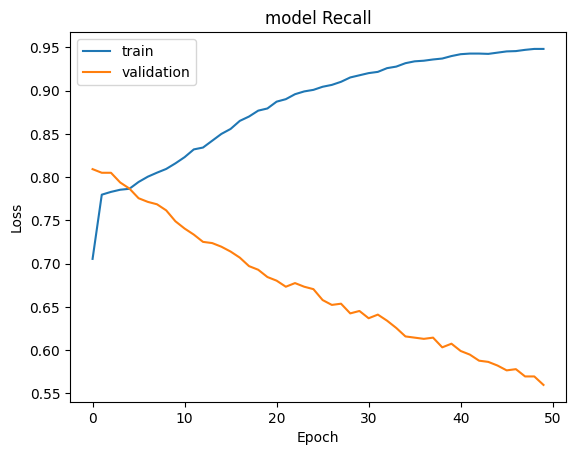

In [206]:
#Plotting Train Recall vs Validation Recall
plt.plot(history_4.history['Recall'])
plt.plot(history_4.history['val_Recall'])
plt.title('model Recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

###Observations:
- The training recall improves consistently, reaching close to perfect recall.

- The validation recall drops sharply after a certain point, reinforcing the evidence of overfitting. The model is not effectively capturing patterns in the validation data.


In [207]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [208]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [False]])

###Observations:
- Predictions for both training and validation datasets show consistent threshold-based outputs, indicating the model's ability to separate classes.

In [209]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [210]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      2787
         1.0       0.93      0.93      0.93      2787

    accuracy                           0.93      5574
   macro avg       0.93      0.93      0.93      5574
weighted avg       0.93      0.93      0.93      5574



###Training Data Observation:
- The model shows balanced and strong performance on the training dataset with precision, recall, and F1-scores consistently at 0.93 for both classes, indicating excellent learning without signs of underfitting or overfitting.

In [211]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      2787
         1.0       0.46      0.56      0.50       713

    accuracy                           0.77      3500
   macro avg       0.67      0.69      0.68      3500
weighted avg       0.79      0.77      0.78      3500



###Validation Data Observation:
- On the validation dataset, precision and recall for class 1 drop significantly (0.46 and 0.56, respectively), resulting in a lower F1-score of 0.50. This suggests the model struggles to generalize well to the minority class in unseen data.

**Confusion matrix**

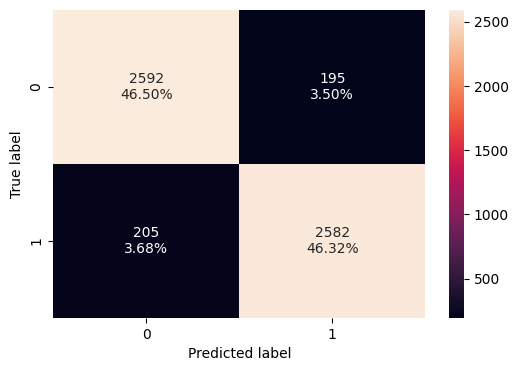

In [212]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

### Observations:
- The confusion matrix for the training dataset indicates balanced predictions after applying SMOTE. True positives (2592) and true negatives (2582) dominate the matrix, suggesting the model performs well in distinguishing classes. However, there are some false negatives (195) and false positives (205), which need consideration for further tuning. The overall performance seems satisfactory for balanced training data.

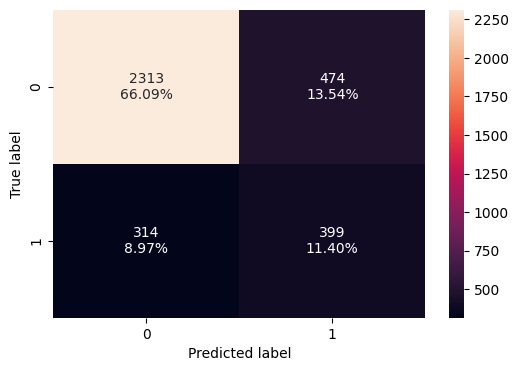

In [213]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

### Observation:
- The confusion matrix for the validation dataset indicates a significant number of correctly classified negatives (2313) and positives (474). However, there are still a notable number of false positives (499) and false negatives (314). This indicates room for improvement in generalization, particularly in distinguishing between classes on unseen data. While the model performs reasonably well, reducing misclassifications should be a focus for optimization.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [214]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

###Model 5

In [215]:
# Initializing the model
model_5 = Sequential()

# Adding the input layer with 64 neurons and ReLU activation function
model_5.add(Dense(64, activation='relu', input_dim=X_train_smote.shape[1]))

# Adding a dropout layer with a rate of 0.2
model_5.add(Dropout(0.2))

# Adding a hidden layer with 32 neurons and ReLU activation function
model_5.add(Dense(32, activation='relu'))

# Adding another dropout layer with a rate of 0.2
model_5.add(Dropout(0.2))

# Adding a hidden layer with 8 neurons and ReLU activation function
model_5.add(Dense(8, activation='relu'))

# Adding the output layer with 1 neuron and sigmoid activation function
model_5.add(Dense(1, activation='sigmoid'))

In [216]:
# Using Adam as the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Uncomment one of the following lines to define the metric to be used
metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.AUC()

In [217]:
# Compile the model
model_5.compile(
    loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
    optimizer=optimizer,        # Adam or any optimizer you defined earlier
    metrics=['Recall']  # Use Recall as the metric
)

In [218]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,121 (12.19 KB)

 Trainable params: 3,121 (12.19 KB)

 Non-trainable params: 0 (0.00 B)

In [219]:
history_5 = model_5.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data=(X_val, y_val))

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - Recall: 0.6066 - loss: 0.6706 - val_Recall: 0.7644 - val_loss: 0.5863
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - Recall: 0.7443 - loss: 0.5606 - val_Recall: 0.8065 - val_loss: 0.5602
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - Recall: 0.7524 - loss: 0.5216 - val_Recall: 0.7812 - val_loss: 0.5198
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - Recall: 0.7449 - loss: 0.5077 - val_Recall: 0.7602 - val_loss: 0.4956
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - Recall: 0.7610 - loss: 0.4977 - val_Recall: 0.7658 - val_loss: 0.5026
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - Recall: 0.7842 - loss: 0.4816 - val_Recall: 0.7602 - val_loss: 0.4925
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - Recall: 0.7791 - loss: 0.4795 - val_Recall: 0.7700 - val_loss: 0.4968
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - Recall: 0.7715 - loss: 0.4802 - val_Recall: 0.7812 - val_loss:

**Loss function**

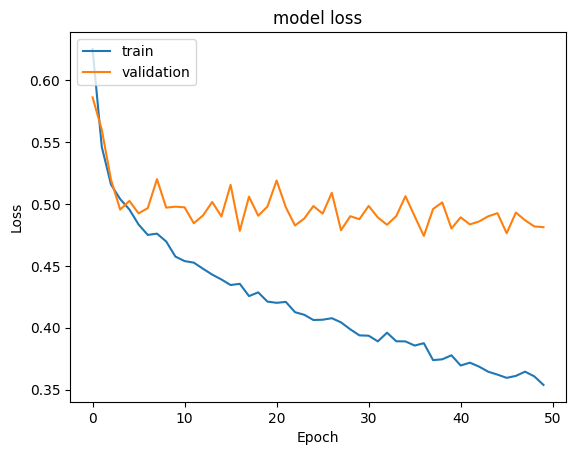

In [220]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Observations:
- The model loss plot indicates a steady decrease in training loss over epochs, which suggests that the model is learning effectively from the training data. However, the validation loss remains higher and fluctuates, suggesting some overfitting or potential instability in performance on unseen data.

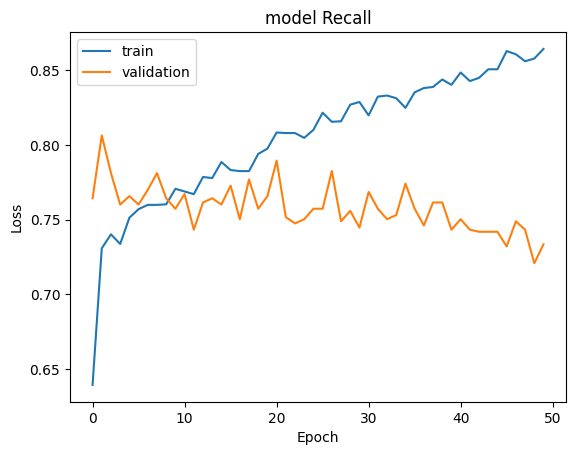

In [221]:
#Plotting Train Recall vs Validation Recall
plt.plot(history_5.history['Recall'])
plt.plot(history_5.history['val_Recall'])
plt.title('model Recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Observations:
- The recall plot demonstrates that training recall steadily increases over epochs, indicating that the model is effectively capturing patterns in the training data.

 However, validation recall shows fluctuations and a downward trend toward the later epochs, suggesting potential overfitting.

In [222]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

###Observation on Training Data Predictions:

The model's predictions on the training data reflect its ability to learn from the training set. Observing the output, a mix of True and False values indicates that the model is successfully differentiating between classes.

In [223]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [False]])

###Observation on Validation Data Predictions:

The predictions on the validation data show the model's ability to generalize to unseen data. A similar distribution of True and False predictions to the training set indicates that the model is consistent.

In [224]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [225]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87      2787
         1.0       0.85      0.93      0.89      2787

    accuracy                           0.88      5574
   macro avg       0.88      0.88      0.88      5574
weighted avg       0.88      0.88      0.88      5574



###Observations on  Training Set:
- **Precision and Recall**: Both classes (0 and 1) show high precision and recall, indicating good prediction performance for the training data.
- **Accuracy**: The model achieves an overall accuracy of 0.88 on the training set, showing a balanced ability to classify correctly.
- **F1-Score**: High F1-scores for both classes (0.87 and 0.89) confirm consistent performance without a bias toward precision or recall.



In [226]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.78      0.84      2787
         1.0       0.46      0.73      0.57       713

    accuracy                           0.77      3500
   macro avg       0.69      0.76      0.71      3500
weighted avg       0.83      0.77      0.79      3500



###Observations on the Validation Set:
- **Precision and Recall**: Class 0 achieves higher precision (0.92) compared to class 1 (0.46). Recall for class 1 is moderately better at 0.73, suggesting challenges in identifying minority class instances.
- **Accuracy**: The overall accuracy is 0.77, showing a decline in performance compared to the training set, which might indicate some overfitting.
- **F1-Score**: F1-scores are lower for the validation set, particularly for class 1 (0.57), reflecting reduced performance on generalization.

**Confusion matrix**

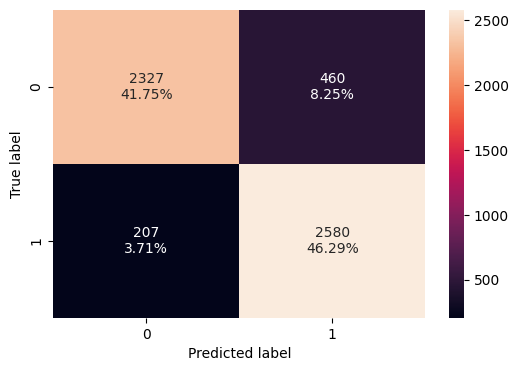

In [227]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

### Observations:

- **True Negatives (TN)**: 2,327 instances (41.75%) of class 0 were correctly identified as class 0. This reflects the model’s ability to handle a significant portion of negative cases.  
- **False Positives (FP)**: 460 instances (8.25) of actual class 0 were misclassified as class 1, indicating a lower rate of over-prediction for class 1.  
- **False Negatives (FN)**: 207 instances (3.71%) of actual class 1 were incorrectly classified as class 0, showing the model occasionally misses some positive cases.  
- **True Positives (TP)**: 2,580 instances (46.29%) of class 1 were correctly identified as positive, highlighting a strong performance in identifying the positive class.  

This confusion matrix suggests a relatively balanced classification performance, with notable strengths in predicting true positives and true negatives while maintaining relatively low false positive and false negative rates.

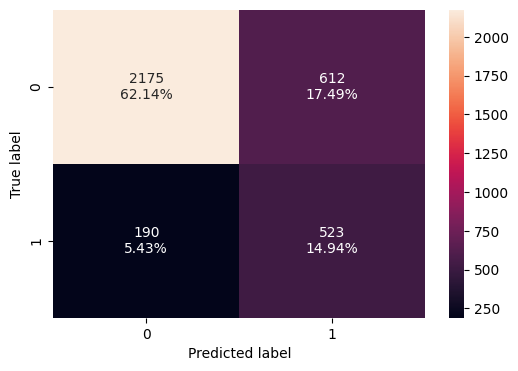

In [228]:
#Calculating the confusion matrix on the validation set
make_confusion_matrix(y_val, y_val_pred)

### Observations:

- **True Negatives (TN)**: 2,1765instances (62.14%) of class 0 were correctly identified as class 0 by the model. This indicates the model is reliable in identifying negative cases.  
- **False Positives (FP)**: 612 instances (17.49%) of actual class 0 were incorrectly predicted as class 1. This reflects the model's tendency to over-predict class 1 in some cases.  
- **False Negatives (FN)**: 190 instances (5.43%) of actual class 1 were mistakenly classified as class 0. This shows the model is missing some positive cases.  
- **True Positives (TP)**: 523 instances (14.94%) of class 1 were correctly identified as positive, indicating the model has a moderate success rate in identifying class 1 correctly.  

The confusion matrix suggests a bias towards predicting the majority class (class 0), as evidenced by the higher percentage of true negatives compared to true positives. However, the model can still identify class 1 with some effectiveness, albeit with room for improvement in reducing false positives and false negatives.

## Model Performance Comparison and Final Model Selection

In [229]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.009818
NN with Adam,0.570827
NN with Adam & Dropout,0.629734
NN with SMOTE & SGD,0.683889
NN with SMOTE & Adam,0.926444
"NN with SMOTE,Adam & Dropout",0.925727


In [230]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.007013
NN with Adam,0.476858
NN with Adam & Dropout,0.446003
NN with SMOTE & SGD,0.684432
NN with SMOTE & Adam,0.559607
"NN with SMOTE,Adam & Dropout",0.733520


In [231]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.002805
NN with Adam,0.093969
NN with Adam & Dropout,0.183731
NN with SMOTE & SGD,-0.000542
NN with SMOTE & Adam,0.366837
"NN with SMOTE,Adam & Dropout",0.192206


### Key Observations:
1. **Training Performance (Recall):**
   - The recall significantly improves as the complexity of the model increases and data balancing (SMOTE) is applied.
   - **"NN with SGD"** has the lowest training recall at **0.009818**.
   - The best performance is achieved by **"NN with SMOTE, Adam & Dropout"** with a recall of **0.9252757**.

2. **Validation Performance (Recall):**
   - Recall for the validation set follows a similar trend.
   - **"NN with SGD"** performs poorly with a recall of **0.007013**, indicating its inability to generalize well.
   - The model **"NN with SMOTE, Adam & Dropout"** achieves the best validation recall at **0.733520**, showing strong generalization.

3. **Impact of SMOTE and Optimizer:**
   - Incorporating SMOTE (to address class imbalance) and the Adam optimizer leads to better recall for both training and validation.
   - Dropout improves model generalization further.

### **Recommended Model:**
The **"NN with SMOTE, Adam & Dropout"** is recommended as it strikes the best balance between training and validation recall, indicating effective learning and generalization.

In [235]:
# Predicting on the test set using the best model
y_test_pred = model_5.predict(X_test)
y_test_pred = (y_test_pred > 0.5)  # Converting probabilities to binary predictions (threshold = 0.5)

# Print predictions
print(y_test_pred)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [ True]
 [False]]


In [236]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.78      0.85      2389
         1.0       0.47      0.74      0.57       611

    accuracy                           0.77      3000
   macro avg       0.69      0.76      0.71      3000
weighted avg       0.83      0.77      0.79      3000



### Key Observations:

1. **Classification Report:**
   - **Class 0 (Majority Class):**
     - Precision: **0.92**, Recall: **0.78**, F1-Score: **0.85**, Support: **2389 samples**.
   - **Class 1 (Minority Class):**
     - Precision: **0.47**, Recall: **0.74**, F1-Score: **0.57**, Support: **611 samples**.
   - **Overall Metrics:**
     - Accuracy: **0.77**, Macro Average F1-Score: **0.71**, Weighted Average F1-Score: **0.79**.

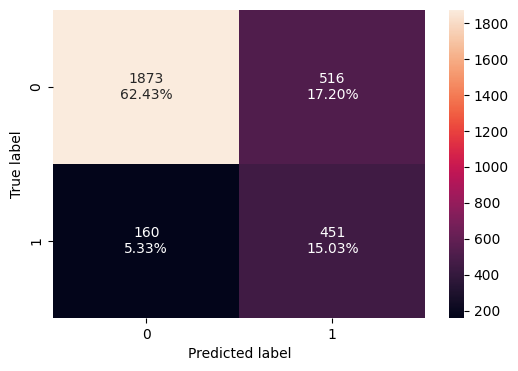

In [237]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

### Confusion Matrix Analysis:
   - **True Positives (Class 0):** **1873** samples correctly classified (**62.43%**).
   - **False Positives (Class 0):** **516** samples misclassified as Class 1 (**17.20%**).
   - **True Positives (Class 1):** **451** samples correctly classified (**15.03%**).
   - **False Negatives (Class 1):** **160** samples misclassified as Class 0 (**5.03%**).

### Insights:
- The model performs reasonably well on the majority class, with high precision and recall.
- For the minority class, the recall is relatively high (**0.74**), indicating the model's ability to capture positive instances. However, the precision for this class (**0.46**) highlights a higher false positive rate.
- Overall, the model achieves balanced performance.

## Actionable Insights and Business Recommendations

1. **Deploy the Model with Caution for Minority Class Decisions:**
   - Given the relatively lower precision for the minority class, ensure that decisions based on positive predictions are further verified. For example, implement an additional review step for high-impact actions.

2. **Focus on Improving Precision for the Minority Class:**
   - Use additional techniques like threshold tuning, cost-sensitive learning, or ensembling to improve precision without compromising recall. This will reduce false positives, enhancing trust in the model's predictions.

3. **Segmented Communication Strategies:**
   - Use predictions to tailor strategies for different classes. For instance:
     - **Majority Class:** Automate routine decisions, as the model is highly reliable here.
     - **Minority Class:** Prioritize these cases for manual review or targeted interventions, considering their importance.

4. **Monitor Model in Production:**
   - Regularly track precision, recall, and F1-score for the minority class. Set up alerts for significant drops in performance to ensure the model continues to deliver actionable results.

5. **Refine Data Collection:**
   - Improve data quality and representation of minority class samples in future iterations to enhance the model’s ability to generalize better across all classes.

6. **Integrate Feedback Loops:**
   - Use predictions from this model as part of a feedback system where human validation or corrections are incorporated into retraining. This can enhance model performance over time.

7. **Business Impact Application:**
   - Utilize the model to improve resource allocation. For example, use predictions to prioritize leads, customers, or cases that are more likely to convert or require immediate attention.

By implementing these recommendations, the business can maximize the utility of this model, ensuring efficient, accurate, and impactful decision-making.

*



<font size=6 color='blue'>Power Ahead</font>
___